<a href="https://colab.research.google.com/github/MohamedAzizChouaibi/MNSIT/blob/main/Handwritten_Digit_Recognition_with_Convolutional_Neural_Networks_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Steps to Approach the Project:
Dataset:

Use the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits (0-9). It's available directly in PyTorch’s torchvision library.

Build the CNN:

Build a simple CNN architecture for recognizing digits.

Input layer: 28x28 image

Convolutional layers with filters (e.g., 32, 64 filters)

Max pooling layers

Fully connected layers for classification

Output layer: 10 neurons (one for each digit)

Hyperparameter Tuning:

Experiment with different hyperparameters like the number of layers, learning rate, batch size, and number of epochs.

Use GridSearch or Random Search to find the optimal values for the learning rate and batch size.

Train the Model:

Split the dataset into training and validation sets.

Train the model using the training data.

Adjust the learning rate, number of epochs, and batch size based on model performance.

Evaluate the Model:

Evaluate the model’s performance on the test set (MNIST test data).

Calculate accuracy, precision, recall, and F1-score.

Visualize the Results:

Use Matplotlib to visualize the loss curves, accuracy over epochs, and sample predictions.

Display some misclassified examples with predictions and ground truth.

Improvement and Advanced Techniques:

Data Augmentation: Apply transformations (e.g., rotation, translation, scaling) to the images to improve the model’s robustness.

Regularization: Use techniques like Dropout to prevent overfitting.

Transfer Learning: Try using pre-trained models like ResNet or VGG and fine-tune them for the digit classification task.

Hyperparameter Optimization: Use tools like Optuna or Ray Tune for better hyperparameter search."'''

'Steps to Approach the Project:\nDataset:\n\nUse the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits (0-9). It\'s available directly in PyTorch’s torchvision library.\n\nBuild the CNN:\n\nBuild a simple CNN architecture for recognizing digits.\n\nInput layer: 28x28 image\n\nConvolutional layers with filters (e.g., 32, 64 filters)\n\nMax pooling layers\n\nFully connected layers for classification\n\nOutput layer: 10 neurons (one for each digit)\n\nHyperparameter Tuning:\n\nExperiment with different hyperparameters like the number of layers, learning rate, batch size, and number of epochs.\n\nUse GridSearch or Random Search to find the optimal values for the learning rate and batch size.\n\nTrain the Model:\n\nSplit the dataset into training and validation sets.\n\nTrain the model using the training data.\n\nAdjust the learning rate, number of epochs, and batch size based on model performance.\n\nEvaluate the Model:\n\nEvaluate the model’s performance on the

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.49MB/s]


In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.conv1=nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1=nn.Linear(6272,128)
    self.fc2=nn.Linear(128,10)
    self.fl=nn.Flatten()
    self.relu=nn.ReLU()
  def forward(self,x):
    x=self.pool(self.relu(self.conv1(x)))

    x=self.fl(x)
    x=self.relu(self.fc1(x))
    return self.fc2(x)
model=Model()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

60000


In [ ]:
j=0
model.train()
for i in range(1):
  for (images,labels) in (train_loader):
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    j+=1
    print(f"{j }/{len(train_loader)}")
    print(loss.item())

1/938
2.306971788406372
2/938
2.6951069831848145
3/938
2.1646227836608887
4/938
2.2226083278656006
5/938
2.2909719944000244
6/938
2.253614664077759
7/938
1.9658946990966797
8/938
1.8610138893127441
9/938
1.89424729347229
10/938
1.8254448175430298
11/938
1.7759673595428467
12/938
1.7791204452514648
13/938
1.6905412673950195
14/938
1.6541476249694824
15/938
1.4361717700958252
16/938
1.4255211353302002
17/938
1.403821349143982
18/938
1.3203295469284058
19/938
1.3094717264175415
20/938
1.1776142120361328
21/938
1.1170530319213867
22/938
1.2385684251785278
23/938
1.1579649448394775
24/938
0.9669444561004639
25/938
1.2148520946502686
26/938
1.0676565170288086
27/938
0.9787575006484985
28/938
0.8348029851913452
29/938
0.9715940952301025
30/938
0.8973438143730164
31/938
0.8247801661491394
32/938
0.9618784189224243
33/938
0.807319164276123
34/938
0.7970635294914246
35/938
0.7305327653884888
36/938
0.6395015120506287
37/938
0.5985910892486572
38/938
0.6119973659515381
39/938
0.6784517168998718
4

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 71, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 100, in _build_session
    session = 

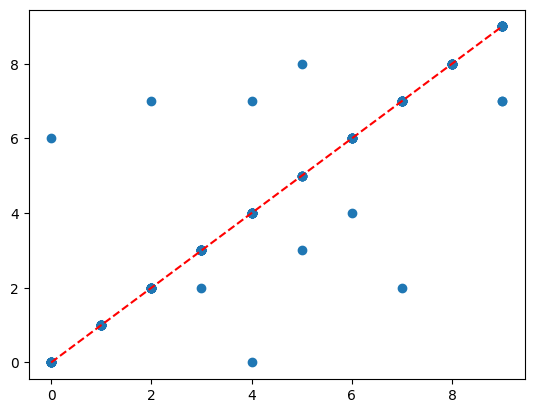

tensor(0.9725)


In [ ]:
model.eval()
from torchmetrics import Accuracy
pred=[]
true=[]
accuracy_score=Accuracy(task="multiclass",num_classes=10)
with torch.no_grad():
  for x,y in test_loader:
    outputs=model(x)
    loss=criterion(outputs,y)
    _,predicted=torch.max(outputs.data,1)
    pred.append(predicted[0].item())
    true.append(y[0].item())
    accuracy_score.update(predicted,y)
plt.scatter(true,pred)
plt.plot([min(true), max(true)], [min(true), max(true)],linestyle='--', color='red')
plt.show()
print(accuracy_score.compute())

In [ ]:
try:
  torch.save(model, 'mnist_model.pth')
  print("finished")
except:
  print("erro")

finished
